# Unsupervised Machine Learning

Unsupervised machine learning is a type of machine learning that looks for previously undetected patterns in a dataset with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labelled data, unsupervised learning, also known as self organisation allows for modelling of probability densities over inputs.

## Problem Statement

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [3]:
# Loading iris dataset
dataset = pd.read_csv("Iris.csv")

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
x = dataset.iloc[:, [1, 2, 3, 4]].values

Now let's implement "The elbow method" on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification.

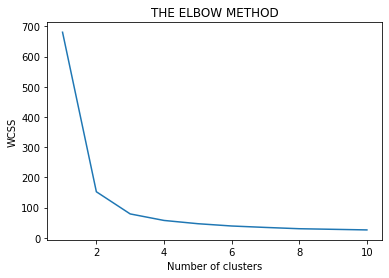

In [8]:
# Finding the optimum number of clusters for K-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = "k-means++",
                   max_iter = 300,
                   n_init = 10,
                   random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe "The elbow"

plt.plot(range(1, 11), wcss)
plt.title("THE ELBOW METHOD")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In the above graph the optimum clusters is where the elbow occurs. Now we have optimum amount of clusters and we can move on to applying K-means clustering to the Iris dataset

In [9]:
# Creating K-Means classifier

kmeans = KMeans(n_clusters = 3,
               init = "k-means++",
               max_iter = 300,
               n_init = 10,
               random_state = 0)
y_kmeans = kmeans.fit_predict(x)

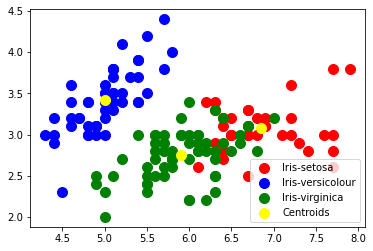

In [11]:
# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = "red", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = "blue", label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = "green", label = "Iris-virginica")

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "yellow", label = "Centroids")
plt.legend()

This concludes the task of predicting the optimum number of clusters and represent it visually.